In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import datetime as dt
from datetime import timedelta
    
import glob
import os

In [21]:

# setting the path for joining multiple files
files = os.path.join("tweet/", "*.csv")

# list of merged files returned
files = glob.glob(files)
files

folder_name = 'tweet'
file_type = 'csv'
seperator =','
tweet = pd.concat([pd.read_csv(f, sep=seperator,lineterminator='\n') for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)
tweet
#map(pd.read_csv,files)
#pd.concat([pd.read_csv('tweet/dogecoin_20220109_20220115.csv'),pd.read_csv('tweet/dogecoin_20211122_20211128.csv')])

,Unnamed: 0,Date,User,Language,Tweet,ReplyCount,RetweetCount,LikeCount\r,LikeCount
0,0,2021-11-27 23:59:59+00:00,dogecointicker,en,The current value of 1 DOGE in USD is: $0.2048...,0,0,3.0,NaN
1,1,2021-11-27 23:59:35+00:00,vintagewastaken,en,@pitoncr7 @dogecoin I plan on holding mine for...,0,0,0.0,NaN
2,2,2021-11-27 23:59:00+00:00,BwcDeals,en,69% Off!\n\nJabra - Evolve 40 Stereo On-Ear He...,1,0,0.0,NaN
3,3,2021-11-27 23:58:51+00:00,CryptoBeggar86,en,Good night #dogefam have a good night #DoOnlyG...,0,0,3.0,NaN
4,4,2021-11-27 23:58:28+00:00,DogeWhaleAlert,en,"🐕🪙🐋🚨\n\n5,109,175 $DOGE ($1,043,048) was trans...",0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
1052015,41183,2022-01-09 00:00:03+00:00,DogeCoinBotEUR,en,Current price of DogeCoin: 0.1331€\n\n$DOGE #D...,0,0,0.0,NaN
1052016,41184,2022-01-09 00:00:02+00:00,CryptoWavesApp,en,[CryptoWaves ⚠️ Market Report]\n\n🟡 Market Now...,0,0,0.0,NaN
1052017,41185,2022-01-09 00:00:02+00:00,Dogecoinvalue,en,"The current price of one DOGE is now: $0.1520,...",1,1,5.0,NaN
1052018,41186,2022-01-09 00:00:01+00:00,DogePriceAlert,en,The current Doge coin price is: $0.1510,0,0,0.0,NaN


In [33]:
tweet1 = tweet.drop(columns = ['Unnamed: 0','LikeCount','LikeCount\r'])

# Like Count cause error in reading files
#tweet1.sort_values('Date')
tweet1 = tweet1.sort_values('Date').reset_index(drop=True)
tweet1['Date2'] = tweet1['Date'].str[:19]

tweet1['Date'] = pd.to_datetime(tweet1['Date2'],format = '%Y-%m-%d %H:%M:%S')

tweet1['Date2'] = tweet1['Date']- timedelta(hours=4)
tweet1


,Date,User,Language,Tweet,ReplyCount,RetweetCount,Date2
0,2021-11-01 00:00:01,babydoge_value,en,The current price of one Baby Doge Coin is: $0...,0,3,2021-10-31 20:00:01
1,2021-11-01 00:00:01,CryptoWavesApp,en,[CryptoWaves ⚠️ Market Report]\n\n⚪️ Market No...,0,0,2021-10-31 20:00:01
2,2021-11-01 00:00:02,Dogecoinvalue,en,"The current price of one DOGE is now: $0.2802,...",0,3,2021-10-31 20:00:02
3,2021-11-01 00:00:02,DogeCoinBotEUR,en,Current price of DogeCoin: 0.24281€\n\n$DOGE #...,0,0,2021-10-31 20:00:02
4,2021-11-01 00:00:03,SurfingDoge,en,▼ DOGECOIN Bearish Momentum ▼\nMomentum is now...,0,0,2021-10-31 20:00:03
...,...,...,...,...,...,...,...
1052015,2022-04-30 23:58:40,fundswift,en,New post (Why Dogecoin Looks Headed To The Dog...,0,0,2022-04-30 19:58:40
1052016,2022-04-30 23:58:51,DogecoinPostive,en,@saylor I head many Bitcoiners are stepping aw...,1,0,2022-04-30 19:58:51
1052017,2022-04-30 23:59:10,Ario62275049,en,@doge_cola @amazon @dogecoin Tasty Dogecola......,0,0,2022-04-30 19:59:10
1052018,2022-04-30 23:59:18,DogeHourly,en,Current #Dogecoin Price: $0.127 📉 🐕+🚀=🌑,0,0,2022-04-30 19:59:18


In [34]:
tweet2 = tweet1.dropna()
tweet2

,Date,User,Language,Tweet,ReplyCount,RetweetCount,Date2
0,2021-11-01 00:00:01,babydoge_value,en,The current price of one Baby Doge Coin is: $0...,0,3,2021-10-31 20:00:01
1,2021-11-01 00:00:01,CryptoWavesApp,en,[CryptoWaves ⚠️ Market Report]\n\n⚪️ Market No...,0,0,2021-10-31 20:00:01
2,2021-11-01 00:00:02,Dogecoinvalue,en,"The current price of one DOGE is now: $0.2802,...",0,3,2021-10-31 20:00:02
3,2021-11-01 00:00:02,DogeCoinBotEUR,en,Current price of DogeCoin: 0.24281€\n\n$DOGE #...,0,0,2021-10-31 20:00:02
4,2021-11-01 00:00:03,SurfingDoge,en,▼ DOGECOIN Bearish Momentum ▼\nMomentum is now...,0,0,2021-10-31 20:00:03
...,...,...,...,...,...,...,...
1052015,2022-04-30 23:58:40,fundswift,en,New post (Why Dogecoin Looks Headed To The Dog...,0,0,2022-04-30 19:58:40
1052016,2022-04-30 23:58:51,DogecoinPostive,en,@saylor I head many Bitcoiners are stepping aw...,1,0,2022-04-30 19:58:51
1052017,2022-04-30 23:59:10,Ario62275049,en,@doge_cola @amazon @dogecoin Tasty Dogecola......,0,0,2022-04-30 19:59:10
1052018,2022-04-30 23:59:18,DogeHourly,en,Current #Dogecoin Price: $0.127 📉 🐕+🚀=🌑,0,0,2022-04-30 19:59:18


In [35]:

from textblob import TextBlob
tweet2["score_TextBlob"] = tweet2["Tweet"].map(lambda x:TextBlob(x).sentiment.polarity)

In [36]:
tweet2[["Tweet","score_TextBlob"]].head(10)

,Tweet,score_TextBlob
0,The current price of one Baby Doge Coin is: $0...,-0.200000
1,[CryptoWaves ⚠️ Market Report]\n\n⚪️ Market No...,0.000000
2,"The current price of one DOGE is now: $0.2802,...",-0.071429
3,Current price of DogeCoin: 0.24281€\n\n$DOGE #...,0.000000
4,▼ DOGECOIN Bearish Momentum ▼\nMomentum is now...,0.000000
5,The current Doge coin price is: $0.2803,0.000000
6,Dogecoin Legacy says that ... \n\nThe current ...,0.000000
7,@elonmusk Doge coin to 3.5$$,0.000000
8,@mishaboar It’s only 1.4 dogecoins for transac...,0.204762
9,@TOPDOGE007 I have enough #shiba maybe more #...,0.250000


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
data_nltk = tweet2.Tweet.str.lower()
sia = SentimentIntensityAnalyzer()
scores = [sia.polarity_scores(sentence) for sentence in data_nltk]
neg_s_n = [i["neg"] for i in scores]
neu_s_n = [i["neu"] for i in scores]
pos_s_n = [i["pos"] for i in scores]
compound_s_n = [i["compound"] for i in scores]

In [38]:
tweet2['negscore_NLTK'], tweet2['neuscore_NLTK'], tweet2['posscore_NLTK'],tweet2['compound_NLTK'] = neg_s_n, neu_s_n, pos_s_n, compound_s_n

In [39]:
tweet2[['Tweet','negscore_NLTK','neuscore_NLTK','posscore_NLTK','compound_NLTK']].head(200)

,Tweet,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
0,The current price of one Baby Doge Coin is: $0...,0.0,1.000,0.000,0.0000
1,[CryptoWaves ⚠️ Market Report]\n\n⚪️ Market No...,0.0,1.000,0.000,0.0000
2,"The current price of one DOGE is now: $0.2802,...",0.0,0.934,0.066,0.2942
3,Current price of DogeCoin: 0.24281€\n\n$DOGE #...,0.0,1.000,0.000,0.0000
4,▼ DOGECOIN Bearish Momentum ▼\nMomentum is now...,0.0,1.000,0.000,0.0000
...,...,...,...,...,...
195,"Highest monthly closed ever for Bitcoin $61,59...",0.0,1.000,0.000,0.0000
196,@elonmusk Tnx for dogecoin 👑🦮❤️❤️,0.0,0.656,0.344,0.2732
197,The #dogearmy needs more IRL meet ups across t...,0.0,1.000,0.000,0.0000
198,Our big 3 Crpytos should be n tha green in the...,0.0,0.901,0.099,0.4926


In [40]:
tweet2[tweet2['compound_NLTK']<0]

,Date,User,Language,Tweet,ReplyCount,RetweetCount,Date2,score_TextBlob,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
18,2021-11-01 00:00:47,VeVeViral,en,Sometimes I think I underestimate the short te...,11,18,2021-10-31 20:00:47,0.025000,0.062,0.914,0.023,-0.1901
39,2021-11-01 00:04:19,bitcoin216,en,The Bias That Propels Shiba Inu and Dogecoin h...,0,0,2021-10-31 20:04:19,0.000000,0.149,0.851,0.000,-0.1027
56,2021-11-01 00:08:00,ORAKOLMUSIC,en,2020s dj costume idea:\n-Adidas dad hat\n-Whit...,0,0,2021-10-31 20:08:00,0.083333,0.055,0.945,0.000,-0.2960
76,2021-11-01 00:10:01,TheBonkerBeat,en,@Safemoon_Babe @CryptoRank_io @LunarCRUSHDevs ...,1,0,2021-10-31 20:10:01,-0.500000,0.080,0.920,0.000,-0.0772
78,2021-11-01 00:10:51,suhail87656849,en,@iamstevencooper @shibburn_ i think shiba is a...,0,0,2021-10-31 20:10:51,-0.200000,0.425,0.575,0.000,-0.8625
...,...,...,...,...,...,...,...,...,...,...,...,...
1051994,2022-04-30 23:54:03,tundemason,en,it’s been boring ever since the dogecoin rubbi...,0,0,2022-04-30 19:54:03,-0.486111,0.317,0.683,0.000,-0.7537
1051998,2022-04-30 23:54:30,Amaduniya,en,My money melted completely this is absolutely ...,0,0,2022-04-30 19:54:30,-0.050000,0.163,0.837,0.000,-0.5984
1052002,2022-04-30 23:55:10,HunnidTc,en,@phillip27076356 @BobBonus01 @ShibBPP Doge coi...,0,0,2022-04-30 19:55:10,-0.666667,0.108,0.788,0.103,-0.0258
1052003,2022-04-30 23:55:30,BitcoinMiningWA,en,@BTCfuel BTC is going to kill alt utility with...,0,0,2022-04-30 19:55:30,-0.700000,0.469,0.531,0.000,-0.9223


In [41]:
tweet2.columns.values

array(['Date', 'User', 'Language', 'Tweet', 'ReplyCount', 'RetweetCount',
       'Date2', 'score_TextBlob', 'negscore_NLTK', 'neuscore_NLTK',
       'posscore_NLTK', 'compound_NLTK'], dtype=object)

In [42]:
tweet3 = tweet2.copy()
#df3.reset_index(df3['Date'],inplace=True)
tweet4 = tweet3.groupby(pd.Grouper(key = 'Date2', axis=0, freq='60min')).mean()
tweet4= tweet4.fillna(0)
tweet5 = tweet4.copy()
tweet5 = tweet5.reset_index()
tweet5 = tweet5.rename(columns = {'Date2':'open_time'})
tweet5

,open_time,ReplyCount,RetweetCount,score_TextBlob,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
0,2021-10-31 20:00:00,4.945824,5.762980,0.102978,0.015637,0.896968,0.087393,0.163241
1,2021-10-31 21:00:00,0.627404,0.625000,0.080334,0.021087,0.900337,0.078584,0.128031
2,2021-10-31 22:00:00,0.931034,9.285057,0.084348,0.039234,0.873103,0.087662,0.121961
3,2021-10-31 23:00:00,0.832905,1.095116,0.082093,0.015211,0.902653,0.082129,0.156291
4,2021-11-01 00:00:00,1.529070,2.444767,0.094369,0.036369,0.883596,0.080026,0.121300
...,...,...,...,...,...,...,...,...
4339,2022-04-30 15:00:00,0.921296,1.074074,0.099803,0.029296,0.878398,0.092315,0.150762
4340,2022-04-30 16:00:00,0.963918,1.711340,0.075525,0.036562,0.869933,0.093526,0.103518
4341,2022-04-30 17:00:00,1.740113,1.508475,0.061700,0.021887,0.917734,0.060379,0.097092
4342,2022-04-30 18:00:00,3.509709,2.752427,0.084683,0.035350,0.887898,0.076762,0.107772


In [43]:
tweet5[tweet5['compound_NLTK']<0]

,open_time,ReplyCount,RetweetCount,score_TextBlob,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
36,2021-11-02 08:00:00,1.601340,3.358459,-0.026857,0.078097,0.864725,0.057171,-0.058296
2008,2022-01-23 12:00:00,1.355114,1.213068,0.104900,0.102972,0.790662,0.106369,-0.125345
2026,2022-01-24 06:00:00,2.108772,2.101754,0.070193,0.071112,0.853228,0.075660,-0.056499
2031,2022-01-24 11:00:00,0.757009,0.633178,0.077187,0.104717,0.804815,0.090467,-0.172656
2609,2022-02-17 13:00:00,1.039216,2.398693,0.097081,0.101039,0.798948,0.099990,-0.109557
2631,2022-02-18 11:00:00,1.663934,2.684426,0.091840,0.089783,0.817730,0.092496,-0.110203
2775,2022-02-24 11:00:00,2.545082,3.459016,0.025142,0.071008,0.869598,0.059393,-0.010838
2779,2022-02-24 15:00:00,1.270718,1.104972,0.064208,0.051646,0.900862,0.047481,-0.007998
3269,2022-03-17 01:00:00,3.821782,3.792079,-0.074885,0.062757,0.903579,0.033668,-0.033955
4257,2022-04-27 05:00:00,8.767507,8.971989,0.051047,0.063697,0.889426,0.046885,-0.025292


In [44]:
tweet5.to_csv('tweetSentimentResult_Hourly.csv')

In [45]:


# setting the path for joining multiple files
files = os.path.join("price/", "*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
price = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(price)

Resultant CSV after joining all CSV files at a particular location...
                  open_time    open    high     low   close     volume  \
0       2021-11-29 11:17:00  0.2132  0.2132  0.2128  0.2129   304642.0   
1       2021-11-29 11:18:00  0.2128  0.2130  0.2127  0.2129  1514084.0   
2       2021-11-29 11:19:00  0.2129  0.2131  0.2127  0.2129   673727.0   
3       2021-11-29 11:20:00  0.2128  0.2132  0.2128  0.2130   316061.0   
4       2021-11-29 11:21:00  0.2131  0.2131  0.2128  0.2128   771283.0   
...                     ...     ...     ...     ...     ...        ...   
297876  2022-04-04 21:32:00  0.1496  0.1498  0.1495  0.1498  1041218.0   
297877  2022-04-04 21:33:00  0.1497  0.1498  0.1494  0.1495   691250.0   
297878  2022-04-04 21:34:00  0.1495  0.1496  0.1492  0.1493  1550471.0   
297879  2022-04-04 21:35:00  0.1494  0.1494  0.1490  0.1492  3632752.0   
297880  2022-04-04 21:36:00  0.1491  0.1492  0.1488  0.1492  1574373.0   

           close_time  quote_volume  trad

In [46]:
price1 = price.sort_values('open_time',ascending=True)
price1['open_time'] =  pd.to_datetime(price1['open_time'])
#price1 = price1.set_index(price1['open_time'],drop = False)
#df1= df.iloc[:,1:6]
price1 = price1.reset_index(drop = True)
price1 = price1.iloc[:,:6]
price1

,open_time,open,high,low,close,volume
0,2021-09-28 16:57:00,0.2000,0.2000,0.1996,0.1997,137414.0
1,2021-09-28 16:58:00,0.1997,0.1998,0.1997,0.1998,113133.0
2,2021-09-28 16:59:00,0.1997,0.1998,0.1996,0.1998,52346.0
3,2021-09-28 17:00:00,0.1998,0.1998,0.1996,0.1997,128646.0
4,2021-09-28 17:01:00,0.1998,0.1999,0.1997,0.1999,166729.0
...,...,...,...,...,...,...
297876,2022-04-23 15:32:00,0.1350,0.1350,0.1349,0.1349,4637.0
297877,2022-04-23 15:33:00,0.1350,0.1351,0.1350,0.1350,319340.0
297878,2022-04-23 15:34:00,0.1350,0.1351,0.1350,0.1350,131407.0
297879,2022-04-23 15:35:00,0.1350,0.1352,0.1350,0.1352,780246.0


In [77]:
price1[238080:238090]

,open_time,open,high,low,close,volume
238080,2022-03-13 01:56:00,0.1157,0.1158,0.1157,0.1158,10281.0
238081,2022-03-13 01:57:00,0.1158,0.1158,0.1157,0.1158,23315.0
238082,2022-03-13 01:58:00,0.1158,0.1158,0.1157,0.1158,36563.0
238083,2022-03-13 01:59:00,0.1157,0.1159,0.1157,0.1159,333021.0
238084,2022-03-13 03:00:00,0.1159,0.1159,0.1158,0.1159,15436.0
238085,2022-03-13 03:01:00,0.1158,0.1160,0.1158,0.1160,445009.0
238086,2022-03-13 03:02:00,0.1160,0.1160,0.1158,0.1160,373085.0
238087,2022-03-13 03:03:00,0.1160,0.1160,0.1159,0.1160,431394.0
238088,2022-03-13 03:04:00,0.1160,0.1160,0.1159,0.1160,595610.0
238089,2022-03-13 03:05:00,0.1160,0.1160,0.1159,0.1159,94016.0


In [47]:
hour_open = price1.drop(columns = ['low','high','close','volume'])
hour_open = hour_open.groupby(pd.Grouper(key = 'open_time', axis=0, freq='60min')).first()
hour_high = price1.drop(columns = ['open','low','close','volume'])
hour_high = hour_high.groupby(pd.Grouper(key = 'open_time', axis=0, freq='60min')).max()
hour_low = price1.drop(columns = ['open','high','close','volume'])
hour_low = hour_low.groupby(pd.Grouper(key = 'open_time', axis=0, freq='60min')).min()
hour_close = price1.drop(columns = ['open','high','low','volume'])
hour_close = hour_close.groupby(pd.Grouper(key = 'open_time', axis=0, freq='60min')).last()

hour_volume = price1.drop(columns = ['open','high','low','close'])
hour_volume = hour_volume.groupby(pd.Grouper(key = 'open_time', axis=0, freq='60min')).sum()

In [48]:
hour_price= pd.concat([hour_open,hour_low,hour_high,hour_close,hour_volume],axis = 1)
hour_price#.to_csv('hour_price.csv')

,open,low,high,close,volume
open_time,,,,,
2021-09-28 16:00:00,0.2000,0.1996,0.2000,0.1998,302893.0
2021-09-28 17:00:00,0.1998,0.1993,0.2006,0.1999,9051114.0
2021-09-28 18:00:00,0.1999,0.1977,0.2000,0.1979,12254306.0
2021-09-28 19:00:00,0.1979,0.1960,0.1988,0.1965,25047433.0
2021-09-28 20:00:00,0.1966,0.1946,0.1984,0.1973,49945995.0
...,...,...,...,...,...
2022-04-23 11:00:00,0.1352,0.1350,0.1356,0.1354,11376963.0
2022-04-23 12:00:00,0.1354,0.1352,0.1360,0.1355,12491597.0
2022-04-23 13:00:00,0.1356,0.1351,0.1356,0.1354,8912290.0


In [52]:
hour_price[hour_price['close'].isnull()]

,open,low,high,close,volume
open_time,,,,,
2021-09-29 03:00:00,NaN,NaN,NaN,NaN,0.0
2021-09-29 04:00:00,NaN,NaN,NaN,NaN,0.0
2022-03-13 02:00:00,NaN,NaN,NaN,NaN,0.0


In [54]:
hour_price1 = hour_price.dropna()
# remove non data 

hour_price1.to_csv('hour_price.csv')
hour_price1

,open,low,high,close,volume
open_time,,,,,
2021-09-28 16:00:00,0.2000,0.1996,0.2000,0.1998,302893.0
2021-09-28 17:00:00,0.1998,0.1993,0.2006,0.1999,9051114.0
2021-09-28 18:00:00,0.1999,0.1977,0.2000,0.1979,12254306.0
2021-09-28 19:00:00,0.1979,0.1960,0.1988,0.1965,25047433.0
2021-09-28 20:00:00,0.1966,0.1946,0.1984,0.1973,49945995.0
...,...,...,...,...,...
2022-04-23 11:00:00,0.1352,0.1350,0.1356,0.1354,11376963.0
2022-04-23 12:00:00,0.1354,0.1352,0.1360,0.1355,12491597.0
2022-04-23 13:00:00,0.1356,0.1351,0.1356,0.1354,8912290.0


In [67]:
hour_price2 = hour_price1[798:]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


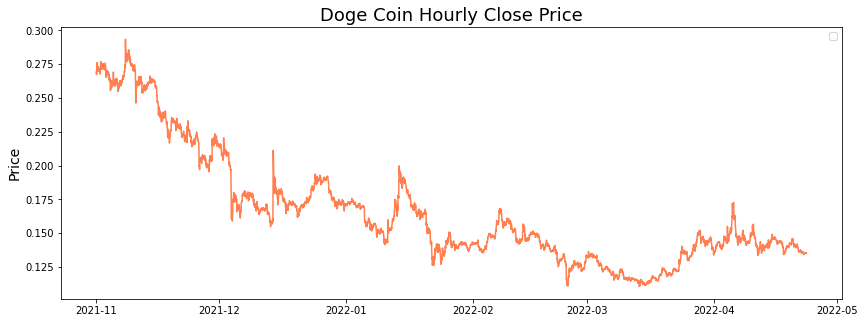

In [69]:

import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.plot(hour_price2['close'],linewidth=1.5,color='coral')
plt.title('Doge Coin Hourly Close Price',fontsize = 18)
#plt.xlabel('Time',fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.legend()
plt.show()

In [71]:
combine_data =pd.merge(hour_price1,tweet5,on = 'open_time')

combine_data.dropna().to_csv('combine_hourly.csv')
combine_data.dropna()

,open_time,open,low,high,close,volume,ReplyCount,RetweetCount,score_TextBlob,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
0,2021-10-31 20:00:00,0.2800,0.2747,0.2866,0.2808,260231484.0,4.945824,5.762980,0.102978,0.015637,0.896968,0.087393,0.163241
1,2021-10-31 21:00:00,0.2809,0.2720,0.2826,0.2732,156756160.0,0.627404,0.625000,0.080334,0.021087,0.900337,0.078584,0.128031
2,2021-10-31 22:00:00,0.2731,0.2640,0.2749,0.2703,192311637.0,0.931034,9.285057,0.084348,0.039234,0.873103,0.087662,0.121961
3,2021-10-31 23:00:00,0.2703,0.2653,0.2723,0.2662,107943845.0,0.832905,1.095116,0.082093,0.015211,0.902653,0.082129,0.156291
4,2021-11-01 00:00:00,0.2661,0.2631,0.2715,0.2693,103851074.0,1.529070,2.444767,0.094369,0.036369,0.883596,0.080026,0.121300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,2022-04-23 11:00:00,0.1352,0.1350,0.1356,0.1354,11376963.0,1.821277,2.238298,0.084075,0.022094,0.889460,0.088451,0.165851
4167,2022-04-23 12:00:00,0.1354,0.1352,0.1360,0.1355,12491597.0,1.602620,1.554585,0.104228,0.014852,0.914913,0.070240,0.137407
4168,2022-04-23 13:00:00,0.1356,0.1351,0.1356,0.1354,8912290.0,0.382075,0.490566,0.079836,0.021071,0.900344,0.078599,0.118608
4169,2022-04-23 14:00:00,0.1354,0.1348,0.1355,0.1351,10615213.0,6.133663,6.866337,0.076718,0.021238,0.892817,0.085950,0.152711


In [59]:
#data =pd.merge(price1,tweet5,on = 'open_time')
#data['compound2'] =data['compound_NLTK']*data['RetweetCount	'] 
#test[test['ReplyCount'].notnull()]
data = combine_data.set_index('open_time')
data = data[4:]
data

,open,low,high,close,volume,ReplyCount,RetweetCount,score_TextBlob,negscore_NLTK,neuscore_NLTK,posscore_NLTK,compound_NLTK
open_time,,,,,,,,,,,,
2021-11-01 00:00:00,0.2661,0.2631,0.2715,0.2693,103851074.0,1.529070,2.444767,0.094369,0.036369,0.883596,0.080026,0.121300
2021-11-01 01:00:00,0.2694,0.2673,0.2704,0.2674,73487091.0,0.497727,0.756818,0.133969,0.014102,0.889377,0.096527,0.236032
2021-11-01 02:00:00,0.2674,0.2662,0.2710,0.2693,69865474.0,0.677340,0.603448,0.122257,0.020695,0.895498,0.083805,0.166608
2021-11-01 03:00:00,0.2692,0.2692,0.2735,0.2730,107414614.0,0.765909,0.993182,0.150842,0.013968,0.890895,0.095120,0.204692
2021-11-01 04:00:00,0.2729,0.2706,0.2749,0.2710,95341110.0,0.453083,0.487936,0.108524,0.014359,0.858716,0.126933,0.212124
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-23 11:00:00,0.1352,0.1350,0.1356,0.1354,11376963.0,1.821277,2.238298,0.084075,0.022094,0.889460,0.088451,0.165851
2022-04-23 12:00:00,0.1354,0.1352,0.1360,0.1355,12491597.0,1.602620,1.554585,0.104228,0.014852,0.914913,0.070240,0.137407
2022-04-23 13:00:00,0.1356,0.1351,0.1356,0.1354,8912290.0,0.382075,0.490566,0.079836,0.021071,0.900344,0.078599,0.118608


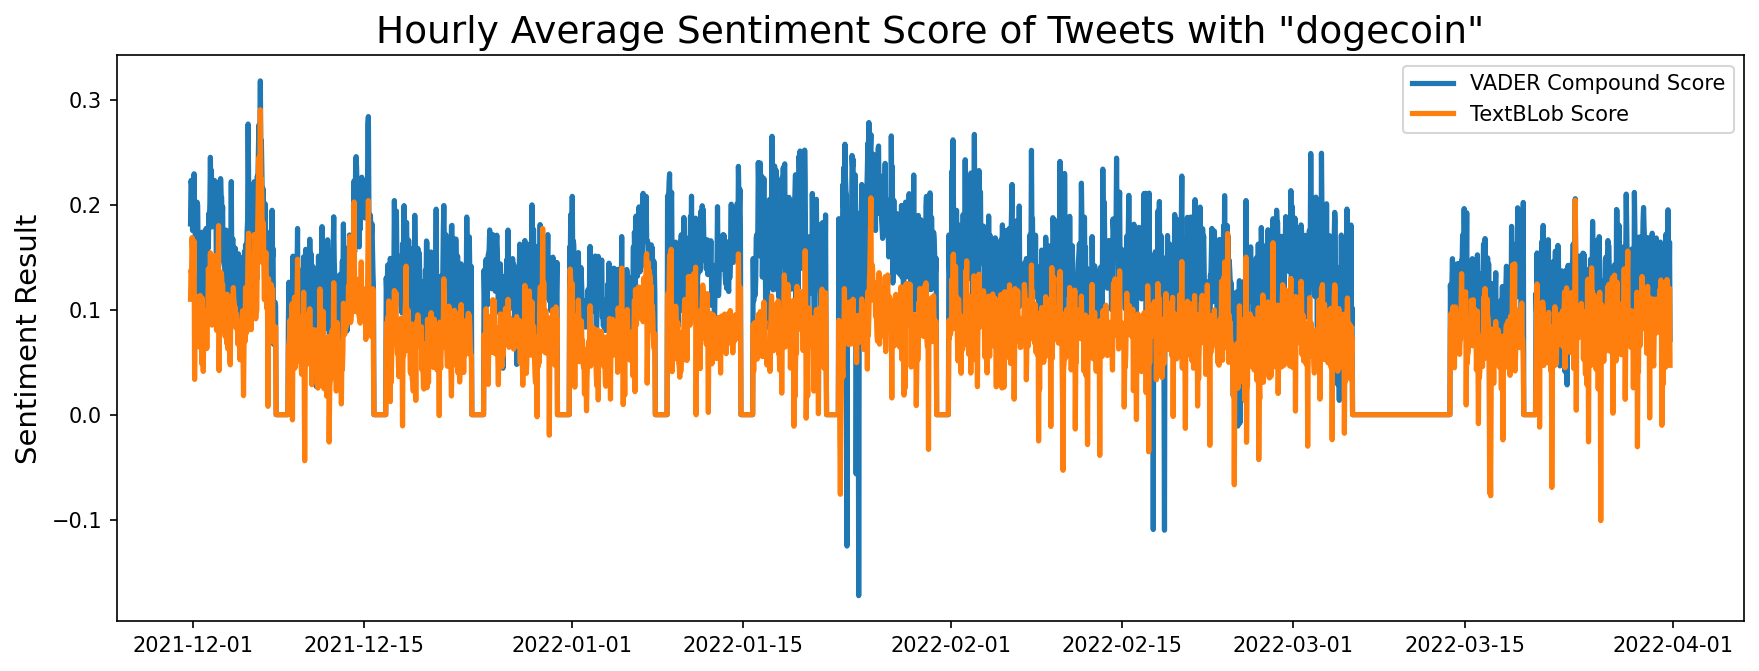

In [96]:


plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] =150
#plt.plot(inv_y)
#plt.plot(inv_yhat)

plt.figure(figsize=(14,5))
plt.plot(data['compound_NLTK'],linewidth=2.5,label = 'VADER Compound Score')
plt.plot(data['score_TextBlob'],linewidth=2.5,label = 'TextBLob Score')
plt.title('Hourly Average Sentiment Score of Tweets with "dogecoin"',fontsize = 18)
#plt.xlabel('Time',fontsize = 14)
plt.ylabel('Sentiment Result',fontsize = 14)
plt.legend()
plt.show()

In [151]:
df = data.copy()
df = df.drop(columns = ['open', 'high', 'low',  'volume',
       'ReplyCount', 'RetweetCount', 'LikeCount', 'score_TextBlob',
       'negscore_NLTK', 'neuscore_NLTK', 'posscore_NLTK'])

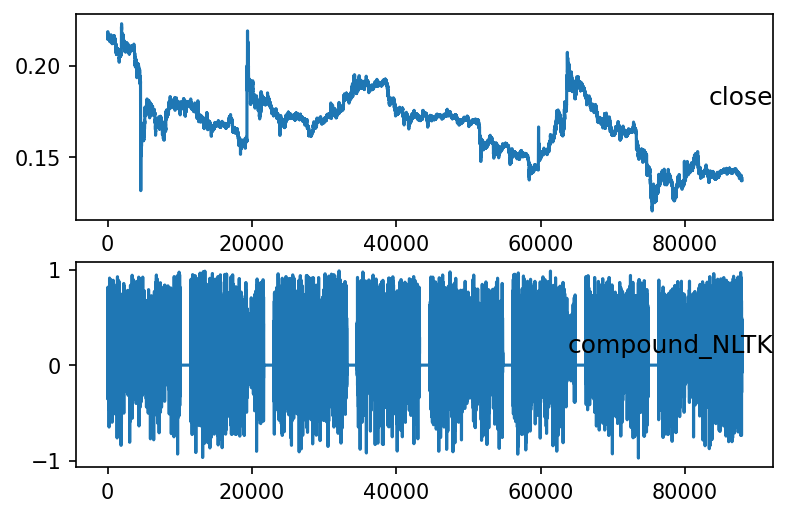

In [152]:
import matplotlib.pyplot as plt
values = df.values
# specify columns to plot
groups = [ 1,2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()